## What is the most optimal skill to learn for Data Analysts?

### Impoting and Cleaning Data

In [39]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading data
datasets = load_dataset('lukebarousse/data_jobs')
df = datasets['train'].to_pandas()

# data cleaning
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skl_lst: ast.literal_eval(skl_lst) if pd.notna(skl_lst) else skl_lst )

### Filtering Data

In [40]:
df_da = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

df_da = df_da.dropna(subset=['salary_year_avg'])
df_explode = df_da.explode('job_skills')

df_explode[['salary_year_avg', 'job_skills']].head(5)


,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


### Calculate Percent of Job Postings that Have Skills

In [90]:
df_skills = df_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

job_count = len(df_da)

df_skills = df_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
df_skills['skill_percent'] = df_skills['skill_count'] / job_count * 100
df_skills = df_skills[df_skills['skill_count'] > 0]
df_skills = df_skills.drop(index=['looker','redshift','spark'])

df_skills.head(20)

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


In [118]:
skill_limit = 5

df_hdem = df_skills[df_skills.skill_percent > skill_limit]
df_hdem

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


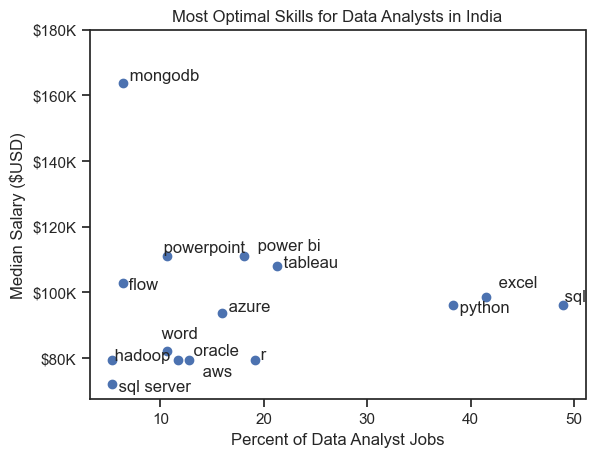

In [122]:
from adjustText import adjust_text

plt.scatter(df_hdem['skill_percent'], df_hdem['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in India')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

texts = []
for i, txt in enumerate(df_hdem.index):
    texts.append(plt.text(df_hdem['skill_percent'].iloc[i], df_hdem['median_salary'].iloc[i], " " + txt))

adjust_text(texts)

plt.ylim(top=180000)
plt.show()

### Coloring

In [96]:
df_tech = df['job_type_skills'].copy()


df_tech = df_tech.drop_duplicates()

df_tech = df_tech.dropna()

tech_dict = {}
for row in df_tech:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in tech_dict:
            tech_dict[key] += value
        else: 
            tech_dict[key] = value


for key, value in tech_dict.items():
    tech_dict[key] = list(set(value))

tech_dict


{'analyst_tools': ['ssis',
  'cognos',
  'qlik',
  'sas',
  'outlook',
  'dax',
  'microstrategy',
  'msaccess',
  'splunk',
  'sharepoint',
  'sheets',
  'ssrs',
  'powerpoint',
  'nuix',
  'esquisse',
  'tableau',
  'power bi',
  'alteryx',
  'word',
  'spreadsheet',
  'sap',
  'excel',
  'ms access',
  'looker',
  'spss',
  'powerbi',
  'visio',
  'datarobot'],
 'programming': ['python',
  'lisp',
  'typescript',
  't-sql',
  'sas',
  'r',
  'f#',
  'perl',
  'ocaml',
  'apl',
  'go',
  'php',
  'no-sql',
  'powershell',
  'mongo',
  'golang',
  'assembly',
  'rust',
  'nosql',
  'julia',
  'sql',
  'css',
  'visual basic',
  'c',
  'vb.net',
  'java',
  'c#',
  'ruby',
  'javascript',
  'scala',
  'lua',
  'groovy',
  'objective-c',
  'fortran',
  'dart',
  'haskell',
  'html',
  'c++',
  'bash',
  'kotlin',
  'pascal',
  'erlang',
  'sass',
  'cobol',
  'elixir',
  'visualbasic',
  'vba',
  'delphi',
  'matlab',
  'solidity',
  'mongodb',
  'clojure',
  'crystal',
  'shell',
  'sw

In [103]:
df_tech = pd.DataFrame(list(tech_dict.items()), columns=['technology', 'skills'])

df_tech = df_tech.explode('skills')

df_tech


,technology,skills
0,analyst_tools,ssis
0,analyst_tools,cognos
0,analyst_tools,qlik
0,analyst_tools,sas
0,analyst_tools,outlook
...,...,...
9,sync,ringcentral
9,sync,mattermost
9,sync,google chat
9,sync,zoom


In [104]:
df_skills_tech = df_skills.merge(df_tech, left_on='job_skills', right_on='skills')

df_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,46,96050.0,48.936170,programming,sql
1,39,98500.0,41.489362,analyst_tools,excel
2,36,96050.0,38.297872,programming,python
3,20,108087.5,21.276596,analyst_tools,tableau
4,18,79200.0,19.148936,programming,r
...,...,...,...,...,...
77,1,79200.0,1.063830,sync,unify
78,1,105650.0,1.063830,other,unreal
79,1,119250.0,1.063830,analyst_tools,visio
80,1,79200.0,1.063830,os,windows


In [121]:
df_tech_hdem = df_skills_tech[df_skills_tech['skill_percent'] > skill_limit]

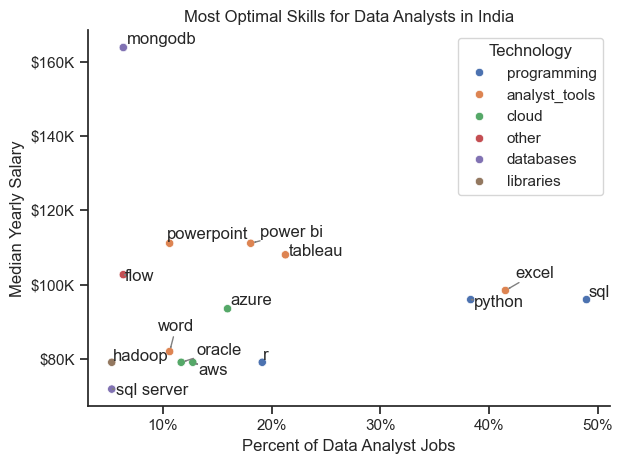

In [120]:
sns.scatterplot(
    data=df_tech_hdem,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_hdem.index):
    texts.append(plt.text(df_hdem['skill_percent'].iloc[i], df_hdem['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in India')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()
